<a href="https://colab.research.google.com/github/doodger/dataScience/blob/master/manymodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Work in this notebook still in progress

In this exercise I will use a few different techniques to build predictors for the wisconcin cancer database. These shall be: a decision tree, random forest, logistic regression and naive bayes

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,scale
import numpy as np
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True) #load dataset
standardized_X = scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0) #20% of data kept for testing, frozen rng seed



#Initial data exploration
The Wisconsin cancer data set concerns samples taken from breast mass of 569 individuals, and analyses the shape of cell nuclei to try to predict malignant breas masses. The features are the mean, standard error and worst of the radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry and fractal dimension. All 30 variables are numeric variables. The classification is into malignant and benign. There is no missing data.



[0.98204467 0.01617649]
[0.44272026 0.18971182]


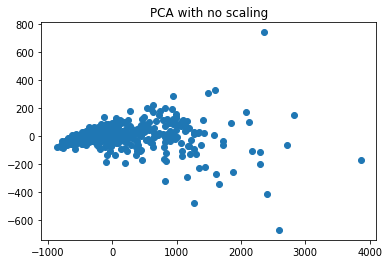

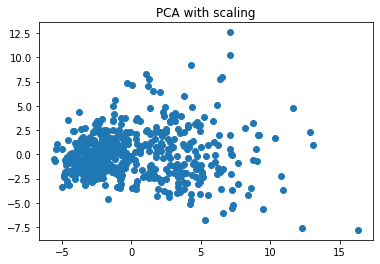

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) #2 component PCA
pca.fit(X)
print(pca.explained_variance_ratio_) #percentage of variance explained by each of the two components
pcaX = pca.transform(X)
plt.figure(0)
plt.title("PCA with no scaling")
plt.scatter(pcaX[:,0],pcaX[:,1])
#with scaling
pca = PCA(n_components = 2) #2 component PCA
pca.fit(standardized_X)
print(pca.explained_variance_ratio_) #percentage of variance explained by each of the two components
pcaX = pca.transform(standardized_X)
plt.figure(1)
plt.title("PCA with scaling")
plt.scatter(pcaX[:,0],pcaX[:,1])

0.9122807017543859

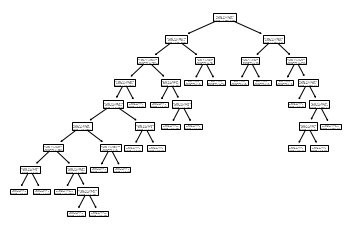

In [9]:
from sklearn import tree
model1 = tree.DecisionTreeClassifier() #unspecificed decision tree
model1 = model1.fit(X_train,y_train) #fit model
tree.plot_tree(model1)
model1.score(X_test, y_test)

The score reached on the validation data is 91.2% for the decision tree, with no level of maximal depth/complexity suggested.

[0.0482125  0.00487705 0.07086435 0.04342543 0.00063544 0.00777506
 0.09576417 0.09503192 0.00020709 0.00147733 0.02353281 0.00152682
 0.00954891 0.04134246 0.00203025 0.00070753 0.00077034 0.00479829
 0.00021785 0.00110994 0.10720012 0.00266729 0.20181539 0.04746476
 0.00098153 0.01250925 0.0157778  0.14594461 0.00301685 0.00876685]


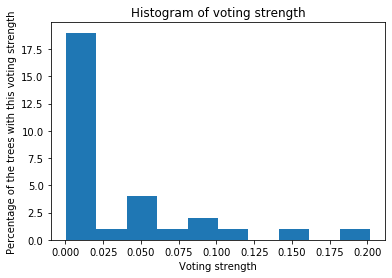

0.956140350877193

In [14]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(max_depth=2, random_state = 0 ) #The maximum depth of each tree is to prevent a swarm of memory eating massive trees. RNG seed is frozen
model2.fit(X_train,y_train)

print(model2.feature_importances_) #relative voting strength of each tree
_ = plt.hist(model2.feature_importances_)
plt.title("Histogram of voting strength")
plt.xlabel("Voting strength")
plt.ylabel("Percentage of the trees with this voting strength")
plt.show()

model2.score(X_test,y_test)

The score on the validation data for the collection of 30 trees with a maximal depth for each tree of 2 is 95.6%

In [18]:
from sklearn.linear_model import LogisticRegression

model3 = LogisticRegression(random_state=0,max_iter=500)
#initially failed to converge on non-preprocessed data using the standard 100 iterations; nor did it converge in full in 500 iterations
#upon reading, the likely culprit of this failure to converge is that using regularization (in this case, L2) makes the predictor scale dependant
sX_train
model3.fit(X_train,y_train) #RNG seed is fixed as before. By default, sklearn uses the L2 penalty, and picks features at random while fitting the model
print("The score is:",model3.score(X_test,y_test))

The score is: 0.956140350877193


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


TODO: 

*   Overfitting test
*   Play around with variants of each model?
*   Training time?
*   Score on training data?
*   What feature comes up in most models? Can this feature be predicted through data analysis beforehand?

